# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [34]:
#Type your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [35]:
df = pd.read_csv('banktransactions_raw.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [37]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [38]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
Categorical Columns: ['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate']


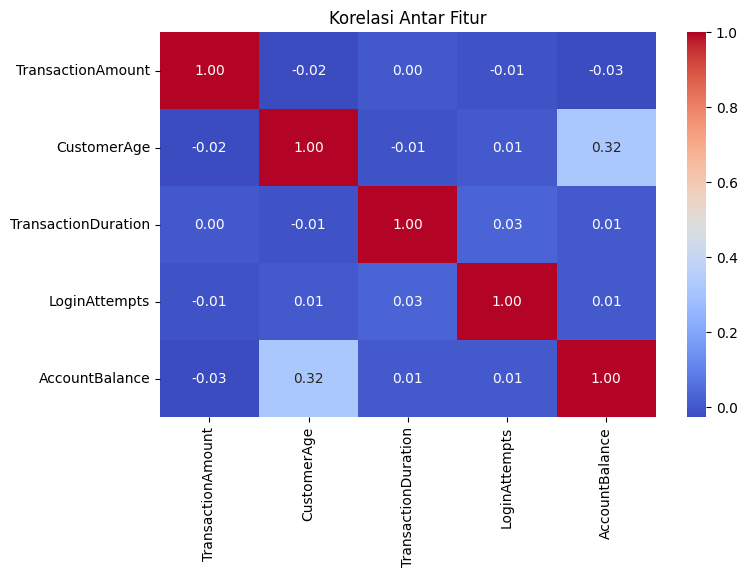

In [39]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelasi Antar Fitur")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

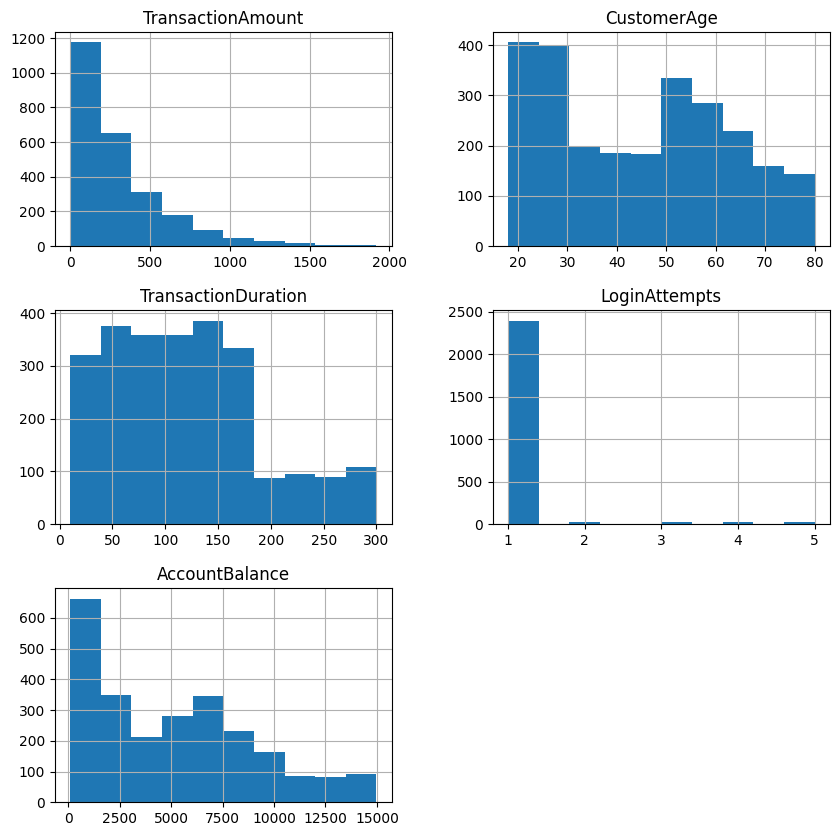

In [40]:
df[numeric_cols].hist(figsize=(10, 10))
plt.show

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [42]:
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

In [43]:
df.duplicated().sum()

np.int64(21)

In [44]:
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

In [45]:
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

df_scaled.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,-0.970546,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,TX000002,AC00455,0.268963,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,TX000003,AC00019,-0.586526,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,TX000004,AC00070,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,TX000005,AC00411,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39


In [46]:
df_scaled = df_scaled.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID'])
df_scaled.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,2023-04-11 16:29:14,Debit,San Diego,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,0.268963,2023-06-27 16:44:19,Debit,Houston,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,-0.586526,2023-07-10 18:16:08,Debit,Mesa,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39


In [47]:
df_scaled['TransactionDate'] = pd.to_datetime(df_scaled['TransactionDate'])
df_scaled['PreviousTransactionDate'] = pd.to_datetime(df_scaled['PreviousTransactionDate'])

df_scaled['TransactionGap'] = (df_scaled['PreviousTransactionDate'] - df_scaled['TransactionDate']).dt.total_seconds()/ 3600
df_scaled = df_scaled.drop(columns=['TransactionDate','PreviousTransactionDate'])
df_scaled.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionGap
0,-0.970546,Debit,San Diego,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,13743.648333
1,0.268963,Debit,Houston,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,11895.421111
2,-0.586526,Debit,Mesa,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,11581.848889
3,-0.387294,Debit,Raleigh,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,13167.615278
4,-0.972736,Credit,Atlanta,Online,NaN,Student,1.121495,-0.204629,0.594263,9230.254167


In [48]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2511 non-null   float64
 1   TransactionType      2507 non-null   object 
 2   Location             2507 non-null   object 
 3   Channel              2510 non-null   object 
 4   CustomerAge          2519 non-null   float64
 5   CustomerOccupation   2514 non-null   object 
 6   TransactionDuration  2511 non-null   float64
 7   LoginAttempts        2516 non-null   float64
 8   AccountBalance       2510 non-null   float64
 9   TransactionGap       2485 non-null   float64
dtypes: float64(6), object(4)
memory usage: 198.3+ KB


In [49]:
encoders = {}
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
for col in categorical_cols:
    le = LabelEncoder()
    df_scaled[col] = df_scaled[col].astype(str)
    df_scaled[col] = le.fit_transform(df_scaled[col])
    encoders[col] = le

df_scaled.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionGap
0,-0.970546,1,36,0,1.419862,0,-0.548393,-0.204629,-0.000315,13743.648333
1,0.268963,1,15,0,1.307715,0,0.307960,-0.204629,2.218381,11895.421111
2,-0.586526,1,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091,11581.848889
3,-0.387294,1,33,2,-1.047361,3,-1.347656,-0.204629,0.886694,13167.615278
4,-0.972736,0,1,2,NaN,3,1.121495,-0.204629,0.594263,9230.254167


In [50]:
df_scaled.isnull().sum()

TransactionAmount      26
TransactionType         0
Location                0
Channel                 0
CustomerAge            18
CustomerOccupation      0
TransactionDuration    26
LoginAttempts          21
AccountBalance         27
TransactionGap         52
dtype: int64

In [51]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TransactionGap']
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

# Imputasi numerik pakai median
for col in numerical_cols:
    median_val = df_scaled[col].median()
    df_scaled[col] = df_scaled[col].fillna(median_val)

# Imputasi kategorikal pakai modus
for col in categorical_cols:
    mode_val = df_scaled[col].mode()[0]
    df_scaled[col] = df_scaled[col].fillna(mode_val)

print("Jumlah missing values setelah imputasi:\n", df_scaled.isnull().sum())
print("\nTipe data akhir:")
print(df.dtypes)

Jumlah missing values setelah imputasi:
 TransactionAmount      0
TransactionType        0
Location               0
Channel                0
CustomerAge            0
CustomerOccupation     0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
TransactionGap         0
dtype: int64

Tipe data akhir:
TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                float64
CustomerOccupation          object
TransactionDuration        float64
LoginAttempts              float64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object


In [52]:
# Menghapus data duplikat menggunakan drop_duplicates().
df_scaled = df_scaled.drop_duplicates().reset_index(drop=True)
df_scaled.duplicated().sum()

np.int64(0)

In [53]:
# Metode IQR untuk deteksi outlier varibel numerik
def count_outliers_iqr(data, col_out):
    hasil = []
    for col in col_out:
        q1 = np.percentile(data[col], 25)
        q3 = np.percentile(data[col], 75)
        IQR = q3 - q1
        lwr_bound = q1 - (1.5 * IQR)
        upr_bound = q3 + (1.5 * IQR)

        # Cari outliers
        outliers = data[(data[col] < lwr_bound) | (data[col] > upr_bound)]
        jumlah_outlier = len(outliers)

        hasil.append({
            "Kolom": col,
            "Jumlah Outlier": jumlah_outlier
        })

    return pd.DataFrame(hasil)

jumlah_outlier_df = count_outliers_iqr(df_scaled, numerical_cols)

print(jumlah_outlier_df)

                 Kolom  Jumlah Outlier
0    TransactionAmount             113
1          CustomerAge               0
2  TransactionDuration               0
3        LoginAttempts             120
4       AccountBalance               0
5       TransactionGap               0


In [54]:
def count_outliers_iqr(data, col_out):
    hasil = []
    for col in col_out:
        q1 = np.percentile(data[col], 25)
        q3 = np.percentile(data[col], 75)
        IQR = q3 - q1
        lower_bound = q1 - (1.5 * IQR)
        upper_bound = q3 + (1.5 * IQR)

        # Cari outliers
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        jumlah_outlier = len(outliers)

        hasil.append({
            "Kolom": col,
            "Jumlah Outlier": jumlah_outlier,
            "Batas Bawah": lower_bound,
            "Batas Atas": upper_bound
        })

        # Print batas atas dan bawah
        f"{col} -> Batas Bawah: {lower_bound:.2f}, Batas Atas: {upper_bound:.2f}"

    return pd.DataFrame(hasil)

# Panggil fungsi
jumlah_outlier_df = count_outliers_iqr(df_scaled, numerical_cols)

# Tampilkan tabel summary
print(jumlah_outlier_df)

                 Kolom  Jumlah Outlier  Batas Bawah    Batas Atas
0    TransactionAmount             113    -2.409928      2.059012
1          CustomerAge               0    -3.682803      3.494572
2  TransactionDuration               0    -2.903364      2.691476
3        LoginAttempts             120    -0.204629     -0.204629
4       AccountBalance               0    -3.278711      3.005261
5       TransactionGap               0  2897.167292  20558.406736


In [55]:
def handle_outliers(data, numerical_cols):
    for column in numerical_cols:
        Q1 = np.percentile(data[column], 25)
        Q3 = np.percentile(data[column], 75)
        IQR = Q3 - Q1 

        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)

        data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
        data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

handle_outliers(df_scaled, numerical_cols)

In [56]:
tot_outlier_df = count_outliers_iqr(df_scaled, numerical_cols)

print(tot_outlier_df)

                 Kolom  Jumlah Outlier  Batas Bawah    Batas Atas
0    TransactionAmount               0    -2.409928      2.059012
1          CustomerAge               0    -3.682803      3.494572
2  TransactionDuration               0    -2.903364      2.691476
3        LoginAttempts               0    -0.204629     -0.204629
4       AccountBalance               0    -3.278711      3.005261
5       TransactionGap               0  2897.167292  20558.406736


In [57]:
# Deteksi Outlier untuk data kategorik
df_scaled['TransactionType'].unique()
type_percentage = df_scaled['TransactionType'].value_counts(normalize=True) * 100
print(type_percentage)

rare_types = type_percentage[type_percentage < 1]
if not rare_types.empty:
    print(rare_types)
else:
    print("Tidak ada kategori dengan proporsi di bawah 1%.")

TransactionType
1    76.412092
0    22.394590
2     1.193317
Name: proportion, dtype: float64
Tidak ada kategori dengan proporsi di bawah 1%.


In [58]:
df_scaled['Location'].unique()
type_percentage = df_scaled['Location'].value_counts(normalize=True) * 100
print(type_percentage)

rare_types = type_percentage[type_percentage < 1]
if not rare_types.empty:
    print(rare_types)
else:
    print("Tidak ada kategori dengan proporsi di bawah 1%.")

Location
13    2.784407
20    2.744630
28    2.704853
40    2.704853
5     2.665076
30    2.665076
24    2.545744
29    2.505967
22    2.505967
15    2.505967
10    2.466189
11    2.466189
4     2.426412
6     2.386635
1     2.386635
39    2.386635
23    2.386635
33    2.346858
14    2.346858
7     2.346858
38    2.346858
17    2.346858
35    2.307080
16    2.307080
27    2.307080
18    2.307080
2     2.307080
36    2.267303
37    2.187749
19    2.187749
41    2.187749
31    2.187749
8     2.147971
26    2.147971
25    2.147971
34    2.068417
3     1.988862
21    1.988862
9     1.909308
12    1.829753
42    1.789976
32    1.670644
0     1.591090
43    1.193317
Name: proportion, dtype: float64
Tidak ada kategori dengan proporsi di bawah 1%.


In [59]:
df_scaled['Channel'].unique()
type_percentage = df_scaled['Channel'].value_counts(normalize=True) * 100
print(type_percentage)

rare_types = type_percentage[type_percentage < 1]
if not rare_types.empty:
    print(rare_types)
else:
    print("Tidak ada kategori dengan proporsi di bawah 1%.")

Channel
1    34.208433
0    32.895784
2    31.821798
3     1.073986
Name: proportion, dtype: float64
Tidak ada kategori dengan proporsi di bawah 1%.


In [60]:
df_scaled['CustomerOccupation'].unique()
type_percentage = df_scaled['CustomerOccupation'].value_counts(normalize=True) * 100
print(type_percentage)

rare_types = type_percentage[type_percentage < 1]
if not rare_types.empty:
    print(rare_types)
else:
    print("Tidak ada kategori dengan proporsi di bawah 1%.")

CustomerOccupation
3    25.934765
0    25.019889
1    24.701671
2    23.428799
4     0.914877
Name: proportion, dtype: float64
CustomerOccupation
4    0.914877
Name: proportion, dtype: float64


In [61]:
df_scaled['CustomerOccupation'] = df_scaled['CustomerOccupation'].replace(4, np.nan)
print(df_scaled['CustomerOccupation'].value_counts(dropna=False))

CustomerOccupation
3.0    652
0.0    629
1.0    621
2.0    589
NaN     23
Name: count, dtype: int64


In [62]:
mode_value = df_scaled['CustomerOccupation'].mode()[0]
df_scaled['CustomerOccupation'] = df_scaled['CustomerOccupation'].fillna(mode_value)

In [63]:
df_scaled['CustomerOccupation'].unique()
type_percentage = df_scaled['CustomerOccupation'].value_counts(normalize=True) * 100
print(type_percentage)

rare_types = type_percentage[type_percentage < 1]
if not rare_types.empty:
    print(rare_types)
else:
    print("Tidak ada kategori dengan proporsi di bawah 1%.")

CustomerOccupation
3.0    26.849642
0.0    25.019889
1.0    24.701671
2.0    23.428799
Name: proportion, dtype: float64
Tidak ada kategori dengan proporsi di bawah 1%.


In [64]:
# Kategorisasi AccountBalance ke 3 kelompok
df_scaled['AccountBalance'] = pd.qcut(
    df_scaled['AccountBalance'],
    q=3, 
    labels=['low', 'mid', 'high']
)

# Label encoding untuk AccountBalance
label_encoder_account = LabelEncoder()
df_scaled['AccountBalance'] = label_encoder_account.fit_transform(df_scaled['AccountBalance'])

df_scaled.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionGap
0,-0.970546,1,36,0,1.419862,0.0,-0.548393,-0.204629,2,13743.648333
1,0.268963,1,15,0,1.307715,0.0,0.307960,-0.204629,0,11895.421111
2,-0.586526,1,23,2,-1.439874,3.0,-0.905207,-0.204629,1,11581.848889
3,-0.387294,1,33,2,-1.047361,3.0,-1.347656,-0.204629,0,13167.615278
4,-0.972736,0,1,2,0.018031,3.0,1.121495,-0.204629,0,9230.254167


In [65]:
df_scaled.to_csv("banktransactions_preprocessing.csv", index=False)